In [1016]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1017]:
data = pd.read_csv('Dataset/clean_data.csv')
data.head(1)

copy = data.copy()

In [1018]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45452 entries, 0 to 45451
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   budget                 45452 non-null  float64
 2   genres                 43067 non-null  object 
 3   id                     45452 non-null  int64  
 4   original_language      45441 non-null  object 
 5   overview               44511 non-null  object 
 6   popularity             45452 non-null  float64
 7   production_companies   33634 non-null  object 
 8   production_countries   39232 non-null  object 
 9   release_date           45452 non-null  object 
 10  revenue                45452 non-null  float64
 11  runtime                45206 non-null  float64
 12  spoken_languages       41554 non-null  object 
 13  status                 45372 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

In [1019]:
data.isna().sum().sort_values(ascending=False)

belongs_to_collection    40955
tagline                  25027
production_companies     11818
production_countries      6220
spoken_languages          3898
genres                    2385
overview                   941
crew                       836
runtime                    246
status                      80
original_language           11
popularity                   0
release_date                 0
budget                       0
id                           0
title                        0
vote_average                 0
vote_count                   0
return                       0
release_year                 0
revenue                      0
dtype: int64

Dropeo las que tienen más de la mitad de los datos

In [1020]:
data.drop(columns=['belongs_to_collection', 'tagline'], inplace=True)

Verificaremos duplicados y los dropeamos

In [1021]:
data['id'].value_counts()

id
141971    9
265189    4
119916    4
152795    4
84198     4
         ..
40594     1
23104     1
37605     1
91727     1
461257    1
Name: count, Length: 45346, dtype: int64

In [1022]:
data.drop_duplicates(subset='id', inplace=True)

Usaremos variables principalmente cuantitativas o coheficientes para los modelo por tanto no tomaremos variables relacionadas al lenguaje

No podemos afirmar necesariamente que una película por su fecha o lenguaje influya directamente, tampoco por su duración.

In [1023]:
data.drop(columns=['spoken_languages', 'original_language', 'runtime', 'release_year'], inplace=True)

Tomaremos solo las películas que han salido

In [1024]:
data = data.loc[(data["status"]=="Released")]

In [1025]:
data.drop(columns=['budget','revenue', 'status'], inplace= True)

In [1026]:
data.drop(columns=['return'], inplace= True)

Eliminaremos overview al no usar el lenguaje como modelo.

Las companias, countries, crew son muchas no nos sirven para caracterizar aunque fueran dumies.

Eliminaremos las fechas al no poder afirmar la correlación y al ser tantas incluso en años y los cantidad de votos al no saber como relacionar en base a la puntuación promedio.

In [1027]:
data.drop(columns=['overview', 'production_companies', 'production_countries', 'crew', 'release_date',
                   'vote_count'], inplace= True)

Crearemos un coheficiente que mida la relación en base a el o los géneros de la película para evitar usar dumies. 
LE TENGO MIEDO A LAS DUMIES :(

In [1028]:
data['genres'] = data['genres'].apply(lambda x: str(x).split(', '))

In [1029]:
pelicula = 'Jumanji'

In [1030]:
generos = data[data['title'] == pelicula]['genres'].values[0]

In [1031]:
data[data['title'] == pelicula]

,genres,id,popularity,title,vote_average
1,"[Adventure, Fantasy, Family]",8844,17.015539,Jumanji,6.9


In [1032]:
generos

['Adventure', 'Fantasy', 'Family']

In [1033]:
coef = []

for h in data['genres']:
    num = 0
    for m in generos:
                
        if(m in h): num += 1
    coef.append(num)
    


In [1034]:
data['genres'][0]

['Animation', 'Comedy', 'Family']

In [1035]:
set(coef)

{0, 1, 2, 3}

In [1036]:
data['coef'] = coef

In [1037]:
X = data[['coef', 'popularity', 'vote_average']].values

In [1038]:
X

array([[1.0000000e+00, 2.1946943e+01, 7.7000000e+00],
       [3.0000000e+00, 1.7015539e+01, 6.9000000e+00],
       [0.0000000e+00, 1.1712900e+01, 6.5000000e+00],
       ...,
       [0.0000000e+00, 9.0300700e-01, 3.8000000e+00],
       [0.0000000e+00, 3.5030000e-03, 0.0000000e+00],
       [0.0000000e+00, 1.6301500e-01, 0.0000000e+00]])

In [1039]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(n_clusters=4, random_state=0)


In [1040]:
# Entrenamos. A diferencia del aprendizaje supervisado, notarán que ya no le pasamos una etiqueta de salida. Solo los atributos.

kmeans_1.fit(X)
#kmeans_2.fit(X)
#kmeans_3.fit(X)

etiquetas_1 = kmeans_1.labels_
centros_1 = kmeans_1.cluster_centers_

c:\Users\germa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1041]:
etiquetas_1[1]

2

In [1042]:

# Obtener las etiquetas de los clusters
labels = kmeans_1.labels_

# Asociar los IDs a las etiquetas
cluster_mapping = dict(zip(list(range(len(data['id']))), labels))

# Mostrar el resultado de la agrupación
for movie_id, cluster_label in cluster_mapping.items():
    if(cluster_label == 2):
        print(f" Película ID: {movie_id}, Cluster: {cluster_label}")

 Película ID: 0, Cluster: 2
 Película ID: 1, Cluster: 2
 Película ID: 2, Cluster: 2
 Película ID: 4, Cluster: 2
 Película ID: 5, Cluster: 2
 Película ID: 6, Cluster: 2
 Película ID: 9, Cluster: 2
 Película ID: 10, Cluster: 2
 Película ID: 12, Cluster: 2
 Película ID: 14, Cluster: 2
 Película ID: 15, Cluster: 2
 Película ID: 16, Cluster: 2
 Película ID: 17, Cluster: 2
 Película ID: 18, Cluster: 2
 Película ID: 19, Cluster: 2
 Película ID: 20, Cluster: 2
 Película ID: 21, Cluster: 2
 Película ID: 22, Cluster: 2
 Película ID: 23, Cluster: 2
 Película ID: 24, Cluster: 2
 Película ID: 26, Cluster: 2
 Película ID: 28, Cluster: 2
 Película ID: 30, Cluster: 2
 Película ID: 31, Cluster: 2
 Película ID: 33, Cluster: 2
 Película ID: 35, Cluster: 2
 Película ID: 37, Cluster: 2
 Película ID: 38, Cluster: 2
 Película ID: 41, Cluster: 2
 Película ID: 42, Cluster: 2
 Película ID: 43, Cluster: 2
 Película ID: 44, Cluster: 2
 Película ID: 46, Cluster: 2
 Película ID: 47, Cluster: 2
 Película ID: 49, Clu

In [1043]:
data.loc[33]


genres          [Fantasy, Drama, Comedy, Family]
id                                          9598
popularity                             14.404764
title                                       Babe
vote_average                                 6.0
coef                                           2
Name: 33, dtype: object

In [1044]:
data[data['id'] == 862]

,genres,id,popularity,title,vote_average,coef
0,"[Animation, Comedy, Family]",862,21.946943,Toy story,7.7,1


In [1045]:
data[data['title'] == pelicula]

,genres,id,popularity,title,vote_average,coef
1,"[Adventure, Fantasy, Family]",8844,17.015539,Jumanji,6.9,3


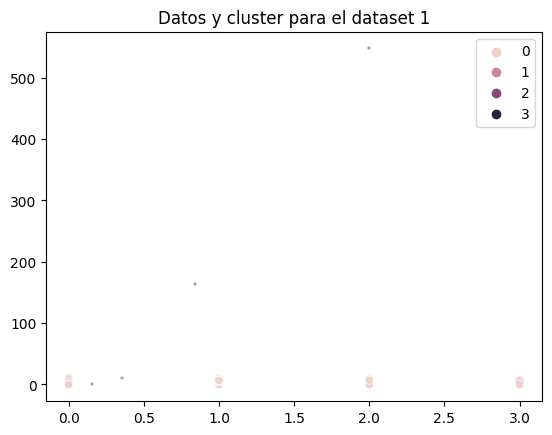

In [1046]:
# Pasamos a graficar

# Dataset 1
sns.scatterplot(x = X[:, 0], y = X[:, -1], hue = labels)
sns.scatterplot(x = centros_1[:, 0], y = centros_1[:, 1],color='black', marker="+", s=10)
plt.title('Datos y cluster para el dataset 1')
plt.show()

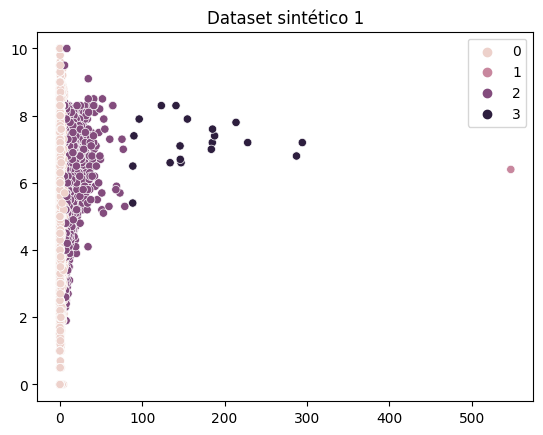

In [1047]:
# Ploteamos cada uno de ellos

sns.scatterplot(x = X[:,1], y = X[:,2], hue = labels)
plt.title('Dataset sintético 1')
plt.show()

In [1048]:
# Creamos una lista donde iremos guardando las distancias medias
Sum_of_squared_distances = []

# Entrenamos un modelo para cada número de cluster que queremos testear
K = np.arange(2,14)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X.shape[0])
    Sum_of_squared_distances.append(distancia_media)

c:\Users\germa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\germa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\germa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\germa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

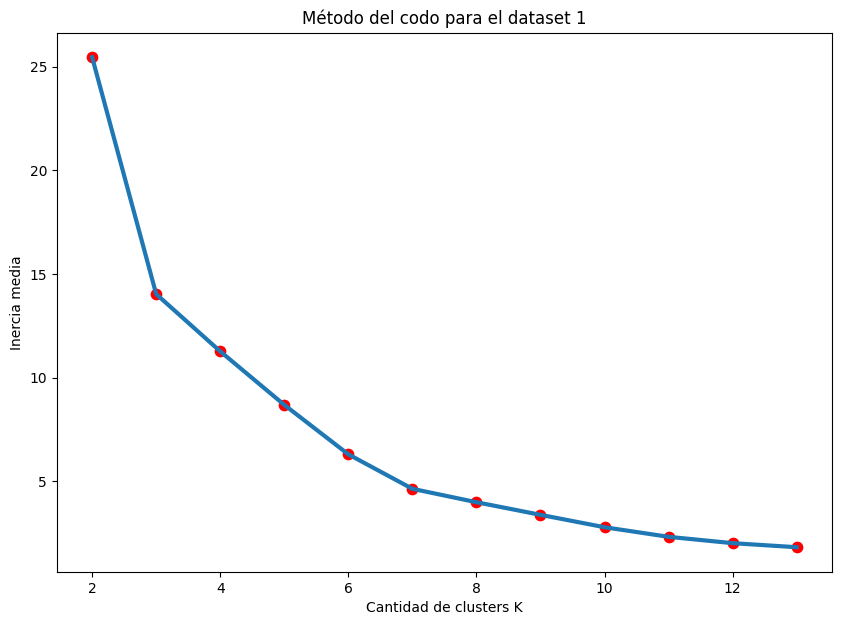

In [1049]:
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el dataset 1')

plt.show()

In [1089]:

reference_point = X[:,0][1], X[:,1][1], X[:,2][1]

# Calcular la distancia euclidiana entre los puntos y el punto de referencia
distances = np.linalg.norm(X - reference_point, axis=1)

# Definir un radio de cercanía para los puntos
radius = 0.9

# Filtrar los puntos cercanos al punto de referencia
nearby_points = X[distances < radius]



In [1090]:

# Supongamos que ya tienes los nearby points
all_points = X  # Todos los puntos, solo como ejemplo


# Calcular la distancia euclidiana entre todos los puntos y los nearby points
distances = np.linalg.norm(all_points[:, np.newaxis] - nearby_points, axis=2)

# Definir un radio de cercanía
radius = 0.9

# Obtener los índices de los nearby points
nearby_indices = np.where(np.any(distances < radius, axis=1))[0]

print("Índices de los nearby points:", nearby_indices)

Índices de los nearby points: [    1   580   997  1965  4155  5715  7673 10540 11062 14811 15748 18942
 22536 31105]


In [1093]:
for i in nearby_indices:
    print(X[:,0][i], X[:,1][i], X[:,2][i])

3.0 17.015539 6.9
3.0 16.357419 7.4
3.0 16.488937 7.0
3.0 16.861533 7.0
3.0 17.987728 7.3
3.0 16.141913 7.2
3.0 16.22986 6.7
3.0 18.13542 6.7
3.0 16.661966 6.4
3.0 17.285093 6.4
3.0 17.674048 6.5
3.0 15.876341 6.7
3.0 16.418133 7.5
3.0 17.432758 6.7


In [1052]:
X[:,0][1], X[:,1][1], X[:,2][1]

(3.0, 17.015539, 6.9)

In [1053]:
X[42670]

array([ 2.      , 16.972835,  6.2     ])

In [1130]:
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (15,12))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)
    ax.scatter(X[:,0][1], X[:,1][1], X[:,2][1], c='black', s=300)
    for i in nearby_points:
        ax.scatter(i[0], i[1], i[2], c='red', s=20)
    

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')


In [1055]:
X[:,0][1], X[:,1][1], X[:,2][1]

(3.0, 17.015539, 6.9)

In [1056]:
data.loc[1]

genres          [Adventure, Fantasy, Family]
id                                      8844
popularity                         17.015539
title                                Jumanji
vote_average                             6.9
coef                                       3
Name: 1, dtype: object

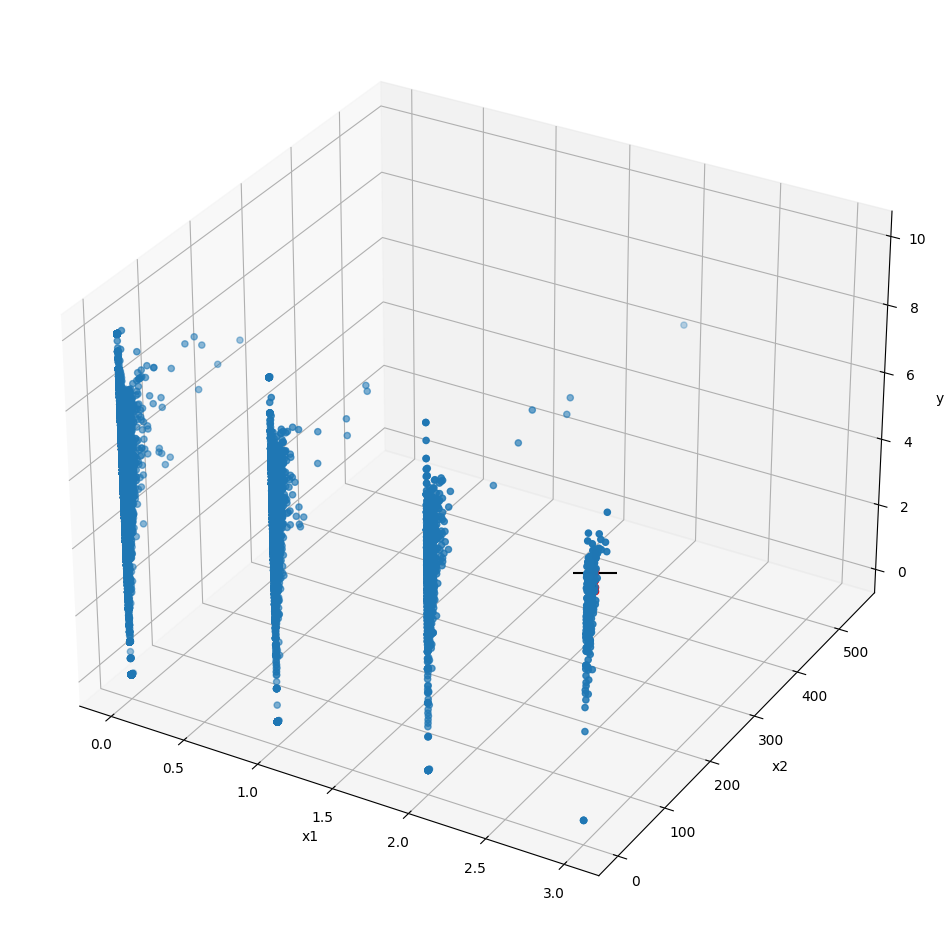

In [1131]:
plot_3d_scatter(X[:,0], X[:,1], X[:,2], ax=None, fig = None)

In [1058]:
from sklearn.cluster import DBSCAN

# Especificamos los valores de los hiperparámetros de los tres modelos.

db_1 = DBSCAN(eps=0.5, min_samples=20)

db_1.fit(X)

DBSCAN(min_samples=20)

In [1059]:
# Consultamos las etiquetas del primer modelo
labels_1 = db_1.labels_

# Número de clusters en las etiquetas, ignorando el ruido en caso que esté presente.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)

In [1060]:
# Consultamos para el primer modelo

print('Número estimado de clusters: %d' % n_clusters_1)
print('Número estimado de puntos de ruido: %d' % n_noise_1)

Número estimado de clusters: 7
Número estimado de puntos de ruido: 1447


In [1061]:
def plot_DBSCAN(X,labels_1,db_1,n_clusters_1):
    # Creamos una máscara
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result

    
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], xy[:, 2], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], xy[:, 2], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Número estimado de clusters: %d' % n_clusters_1, fontsize = 15)
    plt.show()
    return

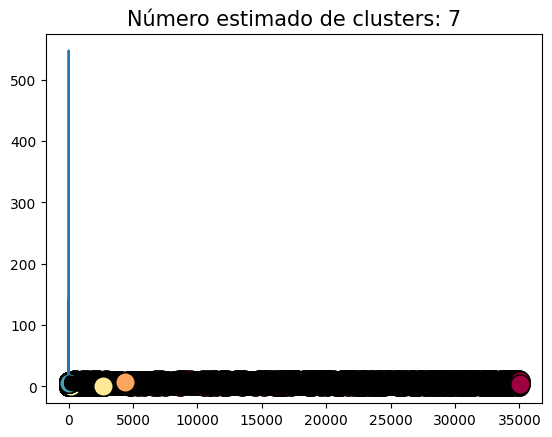

In [1062]:
plot_DBSCAN(X,labels_1,db_1,n_clusters_1)

In [1063]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_DBSCAN_3D(X, labels, db, n_clusters):
    # Creamos una máscara
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    # Creamos la figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Configuración de colores y estilos
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        # Puntos CORES
        xy = X[class_member_mask & core_samples_mask]
        ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], c=tuple(col), marker='o', s=40)

        # Puntos NO CORES
        xy = X[class_member_mask & ~core_samples_mask]
        ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], c=tuple(col), marker='o', s=10)

    # Configuración de título y etiquetas de los ejes
    ax.set_title('Número estimado de clusters: %d' % n_clusters, fontsize=15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Mostrar el gráfico 3D
    plt.show()

C:\Users\germa\AppData\Local\Temp\ipykernel_12808\522806673.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], c=tuple(col), marker='o', s=40)
C:\Users\germa\AppData\Local\Temp\ipykernel_12808\522806673.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], c=tuple(col), marker='o', s=10)


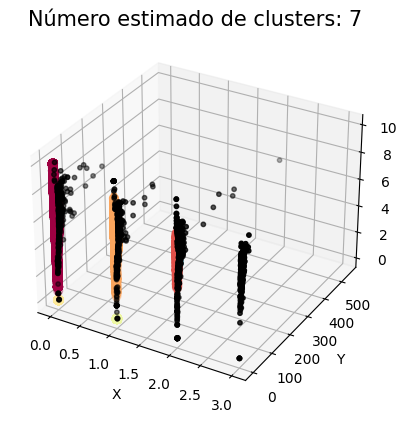

In [1064]:
plot_DBSCAN_3D(X,labels_1,db_1,n_clusters_1)

In [1065]:
labels_1[1]

-1

In [1066]:
data.loc[1]

genres          [Adventure, Fantasy, Family]
id                                      8844
popularity                         17.015539
title                                Jumanji
vote_average                             6.9
coef                                       3
Name: 1, dtype: object

In [1067]:

# Obtener las etiquetas de los clusters

# Asociar los IDs a las etiquetas
cluster_mapping = dict(zip(list(range(len(data['id']))), labels_1))

s = []
# Mostrar el resultado de la agrupación
for movie_id, cluster_label in cluster_mapping.items():
    if(cluster_label == -1):
        #print(f" Película ID: {movie_id}, Cluster: {cluster_label}")
        try:
            s.append(data['vote_average'][movie_id])
        except: s.append(0)

In [1068]:
index = s.index(8.0)
index

65